In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa as lr

# Midi to Frequency Function

In [3]:
def midi_to_freq(p):
    return 440 * 2 ** ((p - 69) / 12) 

# Generate Melody

In [55]:
# Sinuston generieren
sr = 44100
length = sr
t = np.linspace(0,2 * np.pi, length)
melody = np.zeros(0)

#noten generieren
octave = 12
note_steps = np.linspace(60,60 + octave,octave).astype(int)
print(len(note_steps))
print(note_steps)
print("/////////")
# loop für noten
for step in range(octave):
    # noten generieren für jeden step
    melody = np.append(melody,np.sin( t * midi_to_freq(note_steps[step])))
    print(midi_to_freq(note_steps[step]))
# Anhoeren
display(Audio(melody,rate = sr))

12
[60 61 62 63 64 65 66 67 68 69 70 72]
/////////
261.6255653005986
277.1826309768721
293.6647679174076
311.1269837220809
329.6275569128699
349.2282314330039
369.9944227116344
391.99543598174927
415.3046975799451
440.0
466.1637615180899
523.2511306011972


# Basic Envelope Creation


## Import Audio File

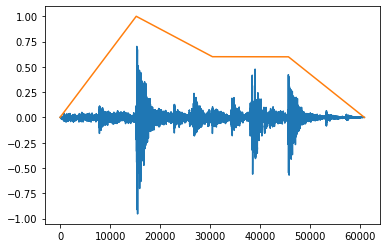

In [64]:
sample, samplerate = lr.load("amen-break.wav", sr = None ) # sr = None fuer native SampleRate

# werte fuer unsere envelope
envlength = len(sample) // 4 # // teilung ohne rest
# Attack
attack = np.linspace(0,1,envlength)
# Decay
decayfac = 0.6
decay = np.linspace(1,decayfac,envlength)
# Sustain
sustain = np.linspace(decayfac,decayfac,envlength)
# Release
release = np.linspace(decayfac,0,envlength)

# np.concatenate
ADSR = np.concatenate((attack,decay,sustain,release))
# envelope auf melody 
samp_ADSR = np.zeros(0)
samp_ADSR = sample * ADSR
# anhoeren
display(Audio(samp_ADSR,rate = samplerate))

#plot

#plt.plot(sample)
plt.plot(samp_ADSR)
plt.plot(ADSR)


# Melody without clicks

In [47]:
# werte fuer unsere envelope

# 12 Noten bei jeder ist ein Click
# ADSR muss länge einer Note haben
notelength = len(melody) // 12
envlength = notelength // 4 # // teilung ohne rest
# Attack
attack = np.linspace(0,1,envlength)
# Decay
decayfac = 0.6
decay = np.linspace(1,decayfac,envlength)
# Sustain
sustain = np.linspace(decayfac,decayfac,envlength)
# Release
release = np.linspace(decayfac,0,envlength)
# ADSR
ADSR_melody = np.concatenate((attack,decay,sustain,release))

melody_no_clicks = np.zeros(len(melody))


for i in range(len(melody)):
    melody_no_clicks[i] = melody[i] * ADSR_melody[i % notelength] 

display(Audio(melody_no_clicks, rate = sr))

# Bonus

## Funktion für Amp Env

In [ ]:
frame_length = 500
hop_size = 80

num_frames = (y.size - frame_length) // hop_size

rms_env = np.zeros(num_frames)
max_env = np.zeros(num_frames)

for i in range(num_frames):
    start_i = i * hop_size
    stop_i = start_i + frame_length
    win = y[start_i:stop_i]
    rms_env[i] = np.sqrt(np.mean(win ** 2))
    max_env[i] = np.max(win)

plt.figure(figsize=(20, 8))
plt.plot(y)
plt.plot(np.linspace(0, y.size, rms_env.size), rms_env)
plt.plot(np.linspace(0, y.size, rms_env.size), max_env)
plt.show()

In [48]:
def calc_amp_env(x,window_size,hop_size):
   

    num_windows = (x.size - window_size) // hop_size #Teilung ohne Rest
    env_max = np.zeros(num_windows)
    env_mean = np.zeros(num_windows)
    for i in range(num_windows):
        start_idx = i * hop_size
        stop_idx = start_idx + window_size
        win = x[start_idx:stop_idx]
        env_max[i] = np.max(win)
        env_mean[i] = np.mean(np.abs(win))
    return [env_max,env_mean]

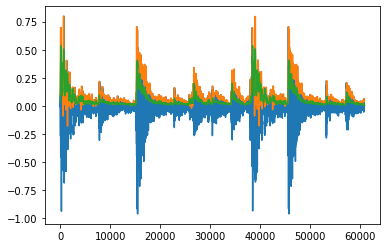

In [116]:
#play with values
window_size = 100
hop_size = 1
max_env, mean_env = calc_amp_env(sample,window_size,hop_size)
plt.plot(sample)
plt.plot(np.linspace(0, sample.size, max_env.size), max_env)
plt.plot(np.linspace(0, sample.size, mean_env.size), mean_env)
plt.show()

In [117]:
# "Amplitude Mod"
# change frequenz
frequenz = 1000
# change function
t = np.linspace(0, 2 * np.pi, sr)
x = np.sin(t * frequenz)
y = np.zeros(0)
for i in range(len(sample) // sr):
    y = np.append(y,x)
    
y = y * max_env[:len(y)]
display(Audio(y,rate = sr))